In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(),'..'))
from ursse.hydra_harp_file_reader import HydraHarpFile
from ursse.LED_tests.data_analyzis import calc_Fano, get_time_window_hist, calc_Fano_from_counts_per_time_window
import numpy as np
import pandas as pd
import seaborn as sns
from ursse.data_processing import \
    get_event_delays, plot_arrival_time_hist, get_events_array, get_fanos, plot_fanos_hist, process_file
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})

In [2]:
file_name = ['background_counts_004.ptu','long_background_counts_test_000.ptu',"long_background_counts_001.ptu","bending_magnet_000.ptu","bending_magnet_002.ptu"][4]
f = HydraHarpFile(file_name,safemode=False)

In [3]:
df, n_revolutions = get_event_delays(f)
t_delays = df.delay

In [4]:
df.head()

,revolution,delay
6,6,64212.0
8,7,62720.0
11,9,65176.0
17,14,65004.0
27,23,64051.0


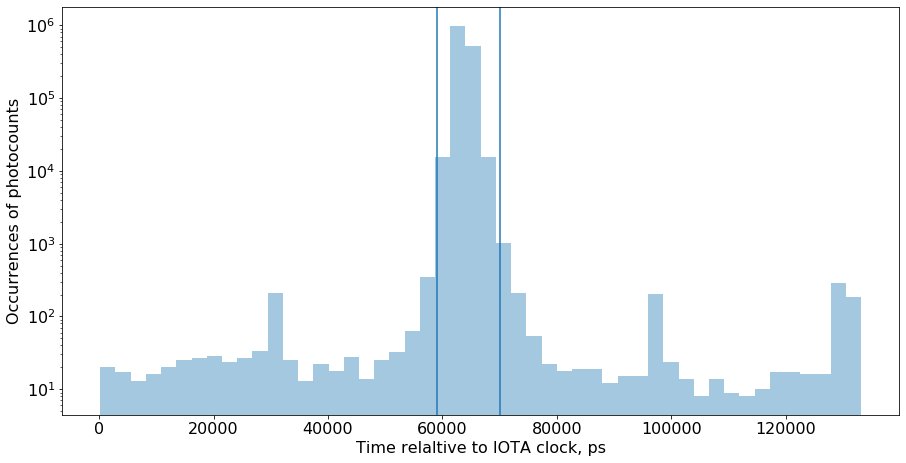

In [5]:
gate = (59000,70000)
plot_arrival_time_hist(t_delays,gate)

`events` is a 1D array, index = revolution number, value is 0 if no photocount, 1 if there was a photocount within the gate. If more than one photocount is present in the gate an exception will be raised, because the dead time is around 20 ns, so given that the gate is typically smaller than that, it is impossible to have more than one count within the gate.

In [6]:
events = get_events_array(df, n_revolutions, gate)
events

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [7]:
fanos, report = get_fanos(events, n_revolutions)

p_measured = 0.205969466059937
chunck_length = 150041
n_events = 1545199
fano_interval = (-0.2600000000000001, -0.14000000000000046)
fnao_interval_percentiles = (0.16, 0.84)
fano_median = nan
fano_mean = nan
absolute_fano_error = 0.05999999999999983


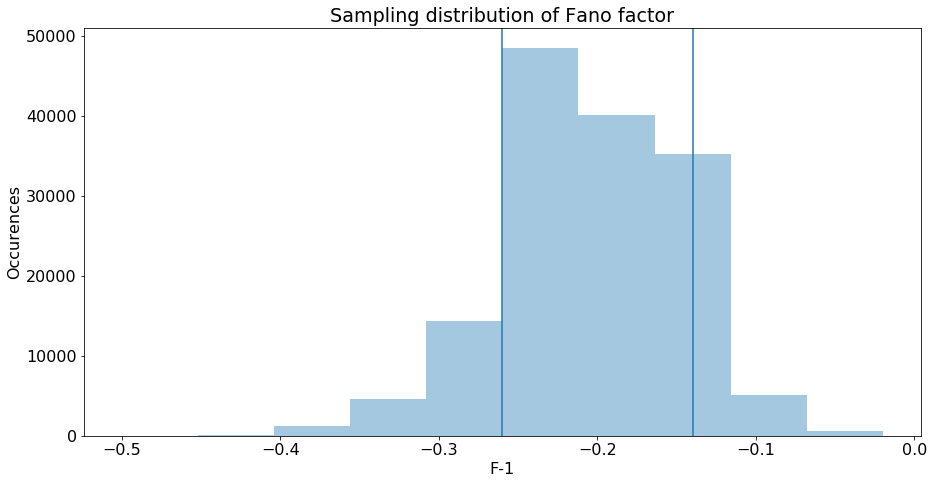

In [8]:
plot_fanos_hist(fanos, report['fano_interval'], bins=10)